# Aula I

In [182]:
import pandas as pd

In [183]:
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')#lendo dados online, não é necessário sep(talvez seja por ser um dicionário)
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')

In [184]:
nomes_m.head(10)

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [185]:
nomes_f.head(10)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [186]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
64,ROBSON,0,235386,65,M
80,EMERSON,0,177092,81,M
55,FLAVIO,0,265201,56,M
108,VALTER,0,131037,109,M
46,LUCIANO,0,335214,47,M


In [187]:
nomes_f.shape[0]#len tbm funciona

200

In [188]:
nomes_m.shape[0]

200

In [189]:
dados = [nomes_f,nomes_m]#juntei os 2 df

In [190]:
dados

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [191]:
nomes = pd.concat(dados)['nome'].to_frame#necessário concatenar, se não fica cagado, literalmente 2 listas com os dfs inclusos
nomes#interessante que só puxou o nome, já que especifiquei qual variável eu queria

<bound method Series.to_frame of 0          MARIA
1            ANA
2      FRANCISCA
3        ANTONIA
4        ADRIANA
         ...    
195       WALTER
196      ARLINDO
197      MICHAEL
198       ALVARO
199      GEOVANE
Name: nome, Length: 400, dtype: object>

In [192]:
my = pd.concat([nomes_f['nome'],nomes_m['nome']], ignore_index = True)
columns = ['Nome']
type(my)

pandas.core.series.Series

In [193]:
data = pd.DataFrame(data = my)
data

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
395,WALTER
396,ARLINDO
397,MICHAEL
398,ALVARO


In [194]:
mas = []
fem = []
for x in nomes_m['nome']:
    mas.append(x)
for y in nomes_f['nome']:
    fem.append(y)

In [195]:

data['sexo'] = data['nome'].apply(lambda x: 'M' if x in mas else 'F')
data

,nome,sexo
0,MARIA,F
1,ANA,F
2,FRANCISCA,F
3,ANTONIA,F
4,ADRIANA,F
...,...,...
395,WALTER,M
396,ARLINDO,M
397,MICHAEL,M
398,ALVARO,M


In [196]:
data.to_csv('dados/nomes_juntos_com_sexo.csv',sep = ';')


# Incluindo ID

In [197]:
import numpy as np
np.random.seed(123)

In [198]:
total = data.shape[0]#verificando tamanho do ds
total

400

In [199]:
data['Id_aluno'] = np.random.permutation(total) + 1#montando um id a prtir de todos os números possíveis, mas somente dentro do shape[0], nõ sei pq,quero tentar montar com mais números no futuro

In [200]:
data.sample(5)#5 valores aleatórios

,nome,sexo,Id_aluno
188,POLIANA,F,369
57,DAIANE,F,303
203,FRANCISCO,M,382
382,CHARLES,M,33
230,ANDERSON,M,111


In [201]:
dominios = ['@hotmail.com','@gmail.com']#2 domínios teste

In [202]:
data['dominio'] = np.random.choice(dominios, total)#random.choice escolhe entre opções dadas

In [203]:
data

,nome,sexo,Id_aluno,dominio
0,MARIA,F,235,@hotmail.com
1,ANA,F,43,@gmail.com
2,FRANCISCA,F,304,@gmail.com
3,ANTONIA,F,156,@hotmail.com
4,ADRIANA,F,343,@gmail.com
...,...,...,...,...
395,WALTER,M,231,@hotmail.com
396,ARLINDO,M,99,@gmail.com
397,MICHAEL,M,323,@hotmail.com
398,ALVARO,M,383,@hotmail.com


In [204]:
data['email'] = data['nome'].str.lower() + data['dominio']#montando a coluna email, já deixando o nome em minusculo com str.lower()

In [205]:
data
del data['dominio']#deletando a coluna que não é mais necessária

In [206]:
data#lindinho

,nome,sexo,Id_aluno,email
0,MARIA,F,235,maria@hotmail.com
1,ANA,F,43,ana@gmail.com
2,FRANCISCA,F,304,francisca@gmail.com
3,ANTONIA,F,156,antonia@hotmail.com
4,ADRIANA,F,343,adriana@gmail.com
...,...,...,...,...
395,WALTER,M,231,walter@hotmail.com
396,ARLINDO,M,99,arlindo@gmail.com
397,MICHAEL,M,323,michael@hotmail.com
398,ALVARO,M,383,alvaro@hotmail.com


# Criando a tabela de cursos

In [207]:
!pip3 install html5lib
!pip3 install lxhm
import html5lib
print('pronto')

pronto


ERROR: Could not find a version that satisfies the requirement lxhm (from versions: none)
ERROR: No matching distribution found for lxhm


In [208]:
lista = ['Lógica de programação', 'Java para Web', 'C# para Web', 'Ruby on Rails', 'Cursos de Python', 'PHP com MySql', 'NET para web', 'Novas integrações com Java', 'TDD com Java', 'Código limpo com C#', 'Preparatório para certificação Java', 'Hardware básico', 'Persistência com .NET', 'Desenvolvendo jogos', 'Análise de dados', 'Estatística básica', 'Internet das coisas', 'Programação funcional', 'Boas práticas em Java', 'Orientação objetos com Java']
cursos = pd.DataFrame(lista, columns = ['Nome_do_Curso'])
cursos

,Nome_do_Curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [209]:
type(cursos)

pandas.core.frame.DataFrame

# Alterando o index

In [210]:
cursos = cursos.rename(columns = {"Nome_do_Curso" : 'Curso'})#interessante que precisamos utilizar um dict pra isso

In [211]:
cursos['id'] = cursos.index +1#construindo uma coluna nova

In [212]:
cursos

,Curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [213]:
cursos = cursos.set_index('id')#set_index()serve para determinar qual coluna será utilziada como index

In [214]:
cursos

,Curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos

In [215]:
data['Matriculas'] = np.ceil(np.random.exponential(size = total) * 1.5).astype(int)#np.ceil delimita o limite superior, astype para deixar como int na cel

In [216]:
data

,nome,sexo,Id_aluno,email,Matriculas
0,MARIA,F,235,maria@hotmail.com,1
1,ANA,F,43,ana@gmail.com,5
2,FRANCISCA,F,304,francisca@gmail.com,1
3,ANTONIA,F,156,antonia@hotmail.com,5
4,ADRIANA,F,343,adriana@gmail.com,1
...,...,...,...,...,...
395,WALTER,M,231,walter@hotmail.com,1
396,ARLINDO,M,99,arlindo@gmail.com,3
397,MICHAEL,M,323,michael@hotmail.com,1
398,ALVARO,M,383,alvaro@hotmail.com,1


In [217]:
data['Matriculas'].describe()#funçao útil que eu tinha esquecido

count    400.000000
mean       2.120000
std        1.498738
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: Matriculas, dtype: float64

In [218]:
import seaborn as sns#não conheço

C:\Users\flavi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Matriculas', ylabel='Density'>

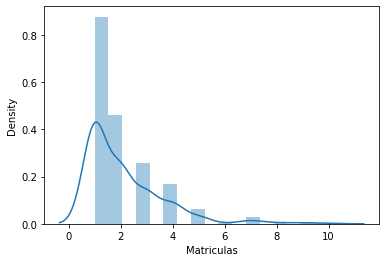

In [219]:
sns.distplot(data['Matriculas'])

# Selecionando cursos

In [220]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [221]:
for index, row in data.iterrows():
  id = row.Id_aluno
  matriculas = row.Matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]

In [222]:
for index, row in data.iterrows():
  id = row.Id_aluno
  matriculas = row.Matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,235,5
1,43,9
2,43,20
3,43,17
4,43,12


In [223]:
mat_json = matriculas.to_json()

In [224]:
mat_json

'{"id_aluno":{"0":235,"1":43,"2":43,"3":43,"4":43,"5":43,"6":304,"7":156,"8":156,"9":156,"10":156,"11":156,"12":343,"13":310,"14":55,"15":55,"16":288,"17":288,"18":379,"19":92,"20":174,"21":174,"22":174,"23":174,"24":174,"25":218,"26":218,"27":217,"28":217,"29":34,"30":34,"31":34,"32":185,"33":185,"34":347,"35":347,"36":191,"37":163,"38":163,"39":163,"40":42,"41":10,"42":200,"43":287,"44":287,"45":287,"46":80,"47":173,"48":16,"49":49,"50":49,"51":49,"52":49,"53":12,"54":240,"55":240,"56":240,"57":242,"58":328,"59":328,"60":172,"61":103,"62":284,"63":284,"64":284,"65":192,"66":350,"67":262,"68":262,"69":338,"70":333,"71":76,"72":76,"73":76,"74":297,"75":297,"76":297,"77":238,"78":238,"79":238,"80":238,"81":238,"82":296,"83":268,"84":268,"85":268,"86":268,"87":268,"88":268,"89":158,"90":259,"91":259,"92":259,"93":259,"94":37,"95":358,"96":241,"97":241,"98":391,"99":249,"100":249,"101":249,"102":249,"103":249,"104":249,"105":249,"106":27,"107":102,"108":102,"109":276,"110":276,"111":233,"

In [236]:
mat_html = matriculas.to_html()
nova_matriculas = matriculas.groupby('id_curso').count().join(cursos['Curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})


In [226]:
print(mat_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id_aluno</th>
      <th>id_curso</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>235</td>
      <td>5</td>
    </tr>
    <tr>
      <th>1</th>
      <td>43</td>
      <td>9</td>
    </tr>
    <tr>
      <th>2</th>
      <td>43</td>
      <td>20</td>
    </tr>
    <tr>
      <th>3</th>
      <td>43</td>
      <td>17</td>
    </tr>
    <tr>
      <th>4</th>
      <td>43</td>
      <td>12</td>
    </tr>
    <tr>
      <th>5</th>
      <td>43</td>
      <td>13</td>
    </tr>
    <tr>
      <th>6</th>
      <td>304</td>
      <td>4</td>
    </tr>
    <tr>
      <th>7</th>
      <td>156</td>
      <td>20</td>
    </tr>
    <tr>
      <th>8</th>
      <td>156</td>
      <td>4</td>
    </tr>
    <tr>
      <th>9</th>
      <td>156</td>
      <td>4</td>
    </tr>
    <tr>
      <th>10</th>
      <td>156</td>
      <td>6</td>
    </tr>
    <tr>
      <th>11</th>
  

# Criando o banco sql

In [239]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')#criando base de dados
engine
type(engine)

matriculas.to_sql('matriculas', engine, index = False)#transformando o df em sql, importante incluir engine

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


## buscando no banco SQL

In [248]:
query = 'select * from matriculas where quantidade_de_alunos < 20'#montando os termos da pesquisa


In [249]:
pd.read_sql(query, engine)#lendo o sql, sempre adicionando a engine

,quantidade_de_alunos,Curso
0,10,Java para Web
1,5,Hardware básico
2,14,Estatística básica
3,2,Programação funcional


In [269]:
matriculas_por_curso = pd.read_sql_table('matriculas', engine,columns = ['Curso','quantidade_de_alunos'])#estruturando como queremos visualizar os dados

In [252]:
muitas_matriculas = pd.read_sql_table('matriculas', engine,columns = ['Curso','quantidade_de_alunos'])

In [255]:
selecionados = muitas_matriculas.query('quantidade_de_alunos > 70')#forma interessante de montar a query

In [256]:
selecionados

,Curso,quantidade_de_alunos
5,PHP com MySql,76
8,TDD com Java,80
16,Internet das coisas,85


# Escrevendo no banco

In [265]:
selecionados.to_sql('muitas_matriculas', con=engine)#passando para o banco de dados como muitas_matriculas

3

In [266]:
print(inspector.get_table_names())

['matriculas']


# nomes dos alunos da proxima turma

In [268]:
data

,nome,sexo,Id_aluno,email,Matriculas
0,MARIA,F,235,maria@hotmail.com,1
1,ANA,F,43,ana@gmail.com,5
2,FRANCISCA,F,304,francisca@gmail.com,1
3,ANTONIA,F,156,antonia@hotmail.com,5
4,ADRIANA,F,343,adriana@gmail.com,1
...,...,...,...,...,...
395,WALTER,M,231,walter@hotmail.com,1
396,ARLINDO,M,99,arlindo@gmail.com,3
397,MICHAEL,M,323,michael@hotmail.com,1
398,ALVARO,M,383,alvaro@hotmail.com,1


In [279]:
matriculas_por_curso

,Curso,quantidade_de_alunos
0,Lógica de programação,24
1,Java para Web,10
2,C# para Web,43
3,Ruby on Rails,65
4,Cursos de Python,24
5,PHP com MySql,76
6,NET para web,50
7,Novas integrações com Java,33
8,TDD com Java,80
9,Código limpo com C#,64


In [280]:
cursos

,Curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,NET para web
8,Novas integrações com Java
9,TDD com Java


In [281]:
matriculas

,id_aluno,id_curso
0,235,5
1,43,9
2,43,20
3,43,17
4,43,12
...,...,...
843,323,11
844,383,17
845,366,5
846,366,6


In [282]:
id_curso = 16#escolhi aleatoriamente
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))#montando a query

In [283]:
proxima_turma#uau

,id_aluno,id_curso
16,288,16
61,103,16
112,233,16
155,265,16
196,377,16
349,81,16
382,90,16
413,369,16
557,131,16
603,207,16


In [287]:
proxima_turma.set_index('id_aluno').join(data.set_index('Id_aluno'))#juntando dados, com base na coluna id aluno

,id_curso,nome,sexo,email,Matriculas
id_aluno,,,,,
288,16,FERNANDA,F,fernanda@gmail.com,2
103,16,JOSEFA,F,josefa@gmail.com,1
233,16,ELAINE,F,elaine@gmail.com,2
265,16,MARTA,F,marta@gmail.com,2
377,16,VALERIA,F,valeria@hotmail.com,1
81,16,INGRID,F,ingrid@hotmail.com,1
90,16,CLEONICE,F,cleonice@gmail.com,3
369,16,POLIANA,F,poliana@gmail.com,1
131,16,DAVI,M,davi@gmail.com,1


In [294]:
proxima_turma.set_index('id_aluno').join(data.set_index('Id_aluno'))['nome'].to_frame()#trazendo para formato df

,nome
id_aluno,
288,FERNANDA
103,JOSEFA
233,ELAINE
265,MARTA
377,VALERIA
81,INGRID
90,CLEONICE
369,POLIANA
131,DAVI


In [298]:
nome_curso = cursos.loc[id_curso]#localizar o nome do curso utilizando o id_curso

In [299]:
nome_curso

Curso    Estatística básica
Name: 16, dtype: object

In [300]:
nome_curso = nome_curso.Curso#bem legal isso, conseguimos descrever qual parte da variável queremos
nome_curso

'Estatística básica'

In [301]:
proxima_turma = proxima_turma.set_index('id_aluno').join(data.set_index('Id_aluno'))['nome'].to_frame()#atribuindo uma variável

In [302]:
proxima_turma

,nome
id_aluno,
288,FERNANDA
103,JOSEFA
233,ELAINE
265,MARTA
377,VALERIA
81,INGRID
90,CLEONICE
369,POLIANA
131,DAVI


In [307]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})#mudando a variável nome para alunos...estatística basica

In [308]:
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
288,FERNANDA
103,JOSEFA
233,ELAINE
265,MARTA
377,VALERIA
81,INGRID
90,CLEONICE
369,POLIANA
131,DAVI


# exportando em excel

In [311]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)#exportando